<a href="https://colab.research.google.com/github/Maurchau/Econometria/blob/main/Ex_Problema1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Consider the data on log DPI (personal disposable income) introduced in Section 21.1
 (see the book’s website for the actual data). Suppose you want to fit a suitable ARIMA
 model to these data. Outline the steps involved in carrying out this task.

Saving Datos 21-1.xlsx to Datos 21-1 (11).xlsx


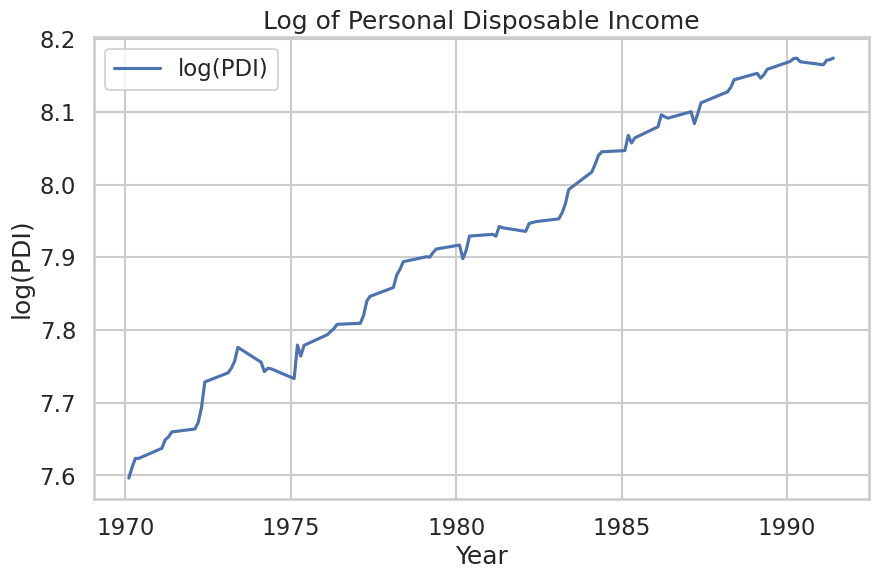

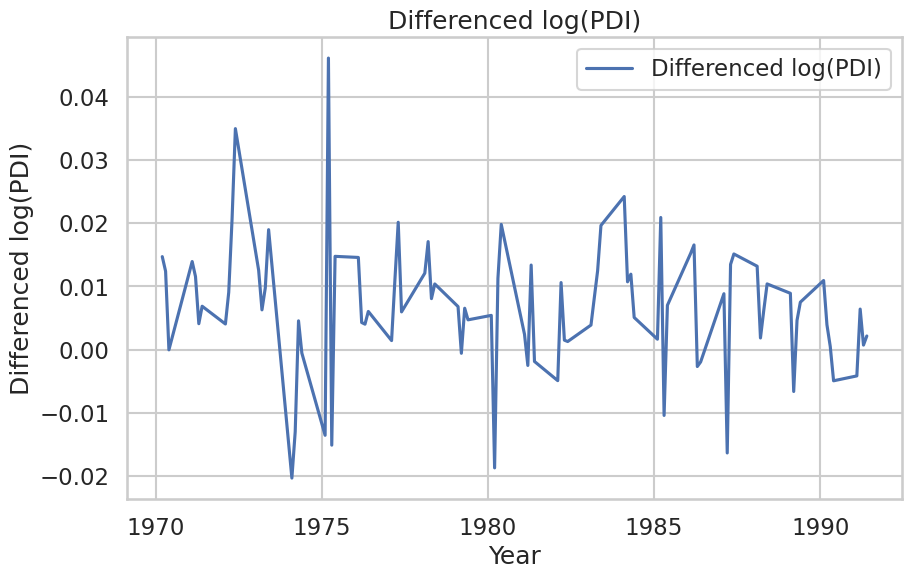

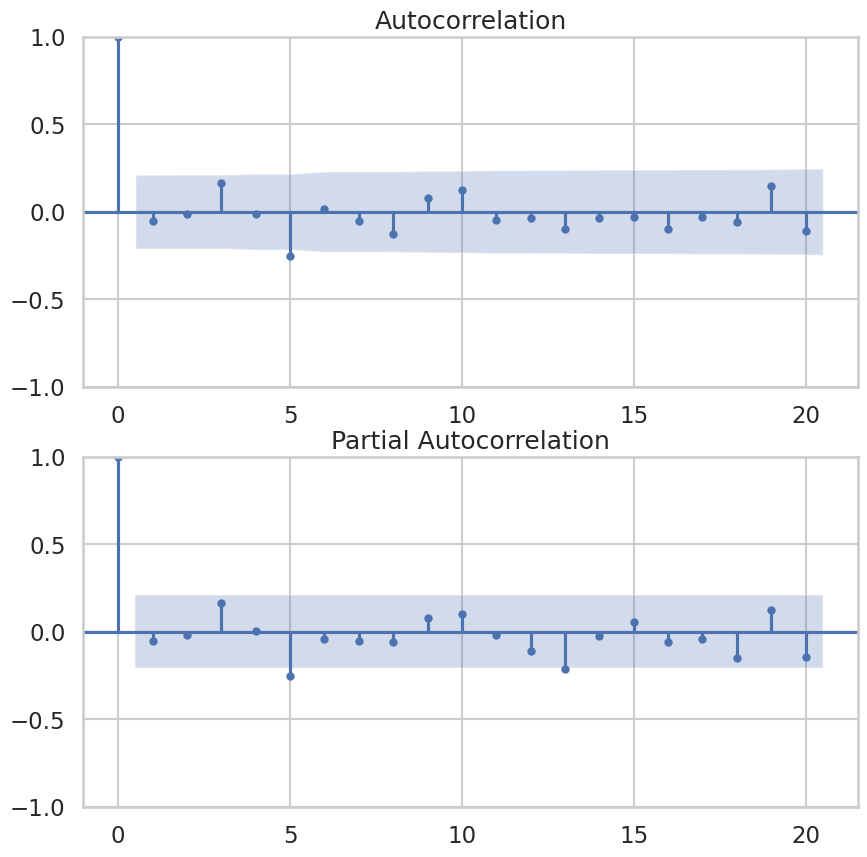

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


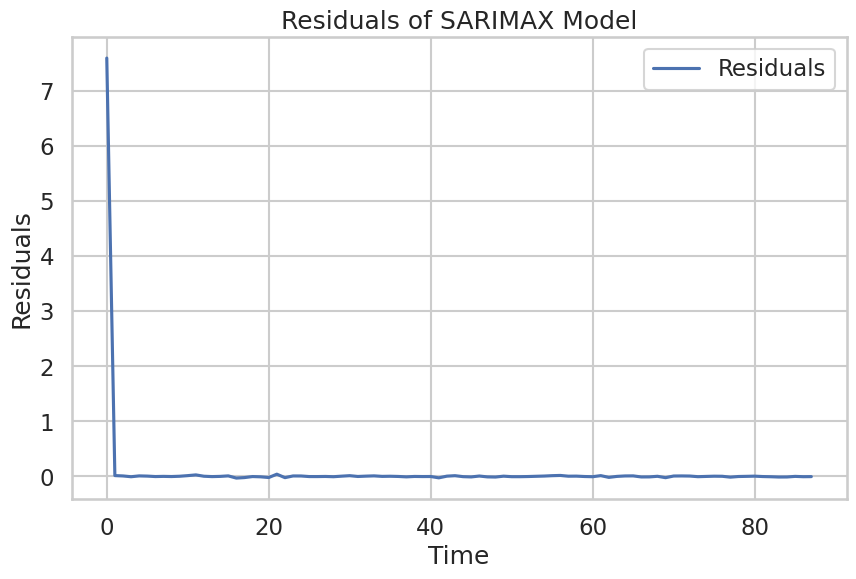

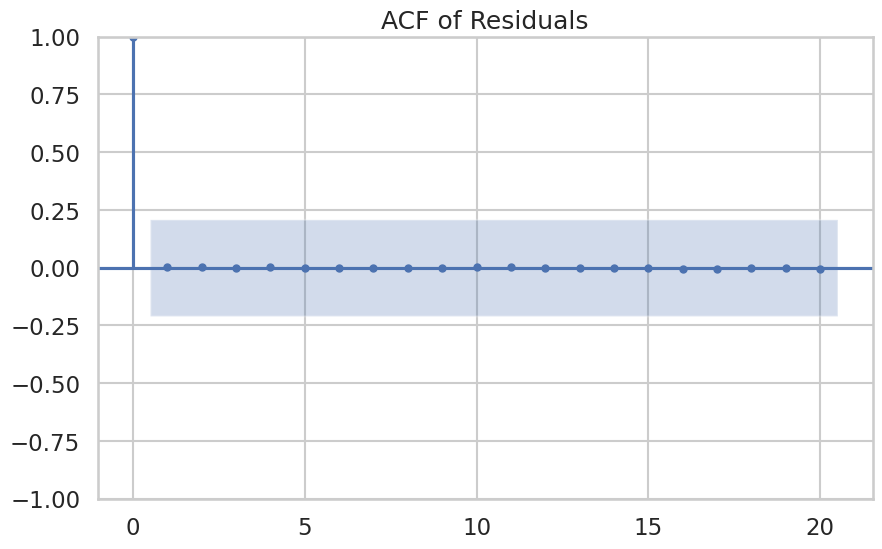

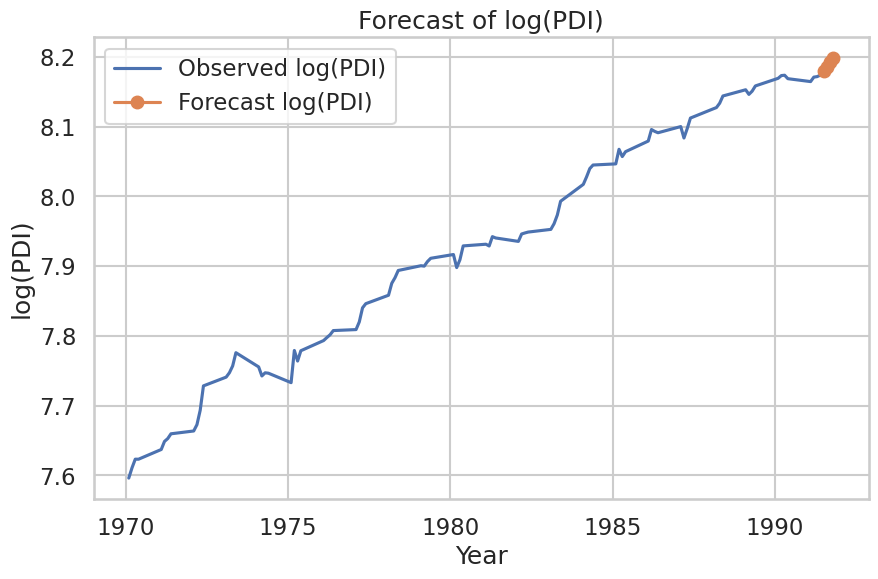

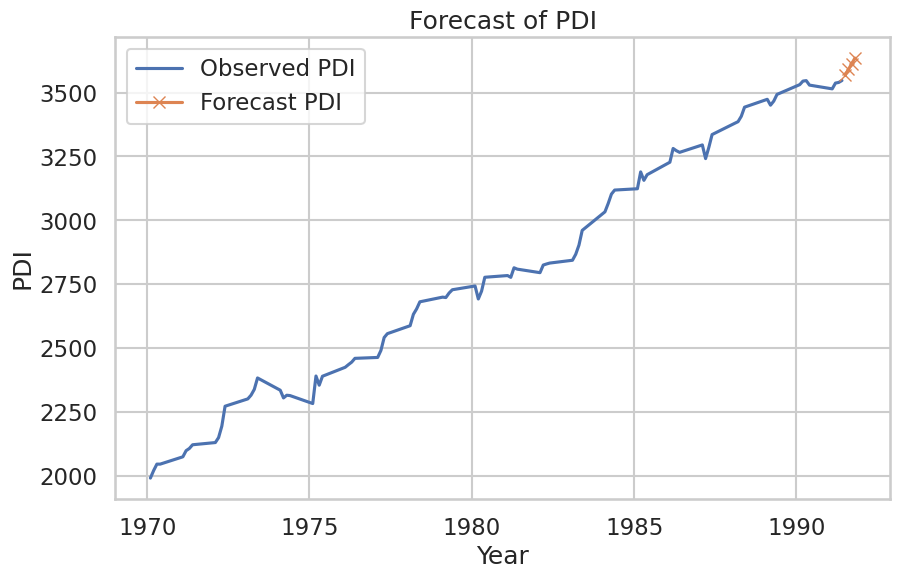


SARIMAX Model Summary:
                               SARIMAX Results                                
Dep. Variable:                log_PDI   No. Observations:                   88
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 270.603
Date:                Fri, 31 Oct 2025   AIC                           -535.206
Time:                        04:19:45   BIC                           -527.808
Sample:                             0   HQIC                          -532.227
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.004    227.570      0.000       0.991       1.008
ma.L1         -0.9856      0.122     -8.047      0.000      -1.226      -0.746
sigma2         0.0001   1.75

In [ ]:
# Step 1: Upload the file
from google.colab import files
uploaded = files.upload()

# Step 2: Load the data
import pandas as pd
import numpy as np
df = pd.read_excel('Datos 21-1.xlsx')
df['log_PDI'] = np.log(df['PDI'])

# Step 3: Plot log(PDI)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], df['log_PDI'], label='log(PDI)')
plt.title('Log of Personal Disposable Income')
plt.xlabel('Year')
plt.ylabel('log(PDI)')
plt.grid(True)
plt.legend()
plt.show()

# Step 4: Test for stationarity
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['log_PDI'])
adf_statistic = adf_result[0]
adf_pvalue = adf_result[1]

# Step 5: Differencing if not stationary and plot
if adf_pvalue > 0.05:
    df['log_PDI_diff'] = df['log_PDI'].diff()
    series_to_use = df['log_PDI_diff'].dropna()
    d = 1
    plt.figure(figsize=(10, 6))
    plt.plot(df['YEAR'][1:], df['log_PDI_diff'][1:], label='Differenced log(PDI)')
    plt.title('Differenced log(PDI)')
    plt.xlabel('Year')
    plt.ylabel('Differenced log(PDI)')
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    series_to_use = df['log_PDI']
    d = 0

# Step 6: ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
plot_acf(series_to_use, ax=ax[0])
plot_pacf(series_to_use, ax=ax[1])
plt.show()

# Step 7: Fit SARIMAX model (ARIMA is a special case of SARIMAX)
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(df['log_PDI'], order=(1, d, 1), seasonal_order=(0,0,0,0))
sarimax_fit = sarimax_model.fit(disp=False)

# Step 8: Residual diagnostics and plots
residuals = sarimax_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of SARIMAX Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot_acf(residuals, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()

# Step 9: Forecast next 4 periods
forecast_log = sarimax_fit.forecast(steps=4)
forecast_actual = np.exp(forecast_log)
future_years = [df['YEAR'].iloc[-1] + 0.1 * (i+1) for i in range(4)]

# Step 10: Forecast chart for log(PDI)
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], df['log_PDI'], label='Observed log(PDI)')
plt.plot(future_years, forecast_log, label='Forecast log(PDI)', marker='o')
plt.title('Forecast of log(PDI)')
plt.xlabel('Year')
plt.ylabel('log(PDI)')
plt.grid(True)
plt.legend()
plt.show()

# Step 11: Forecast chart for actual PDI
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], df['PDI'], label='Observed PDI')
plt.plot(future_years, forecast_actual, label='Forecast PDI', marker='x')
plt.title('Forecast of PDI')
plt.xlabel('Year')
plt.ylabel('PDI')
plt.grid(True)
plt.legend()
plt.show()

# Step 12: SARIMAX summary and coefficients
print('\nSARIMAX Model Summary:')
print(sarimax_fit.summary())

print('\nSARIMAX Model Coefficients:')
print(sarimax_fit.params)

# Step 13: Summary table
from statsmodels.stats.diagnostic import acorr_ljungbox
resid_mean = np.mean(residuals)
resid_var = np.var(residuals)
ljung_box_pvalue = acorr_ljungbox(residuals, lags=[10], return_df=True)['lb_pvalue'].values[0]

summary = pd.DataFrame({
    'Metric': [
        'SARIMAX Order',
        'ADF Statistic',
        'ADF p-value',
        'Model Coefficients',
        'Residual Mean',
        'Residual Variance',
        'Ljung-Box p-value (lag=10)',
        'Forecasted log(PDI)',
        'Forecasted PDI'
    ],
    'Value': [
        f'SARIMAX(1,{d},1)(0,0,0,0)',
        round(adf_statistic, 4),
        round(adf_pvalue, 4),
        sarimax_fit.params.to_dict(),
        round(resid_mean, 4),
        round(resid_var, 4),
        round(ljung_box_pvalue, 4),
        [round(val, 4) for val in forecast_log],
        [round(val, 2) for val in forecast_actual]
    ]
})

print('\nSummary Table:')
print(summary.to_string(index=False))

**Interpretacion**
Se ajusto el modelo SARIMAX con parametros (1,1,1) a la serie de PDI transformada con logaritmo. Se tienen 88 obervaciones.

El test de ADF tiene un estaditico de -1.4407 con un pvalor de .5626 lo que indica que la serie original no es estacionario y por eso se aplico una diferenciacion.

Los coeficientes estimados para el modelo autoregresivo arl1 es 0.9997 y el paramatetro de media movil es -0.9856. son altamente significatibos.

La varianza del error es baja. Sugiere buen ajuste.

El valor de LJUNG BOX para los residuos es de 1 lo que dice que no hay autocorrelacion significativa y se puedieran llamr ruido blanco.

El promedio y varianza de residuos es bajo.

El modelo tiene un aic de -535 y bic de -527 lo que indica un buen ajuste.

In [ ]:
!jupyter nbconvert --to html /content/Ex_Problema1.ipynb

[NbConvertApp] Converting notebook /content/Ex_Problema1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 724239 bytes to /content/Ex_Problema1.html


**Respuesta a pregunta: Pasos Para Arima**

*   Ver la serie de tiempo y en casi de que sea inestable transformarla con logaritmo para estabilizar como se hizo con el PDI.
*   Usar el Augmented dickey fuller test para identificar estacionariedad en la serie.
*   Analizar gráficos ACF Y PACF para determinar los parametros del modelo ARIMA.
*   Ajustar el modelo arima usando los parametros.
*   Ver AIV Y BIC para analizar que tan bien se ajusta
*   Usar el modelo Arima para proytecciones. En caso de haber transformado hay que deshacer la transformacion con logaritmo.









**Prompt a Copilot** No me deja compartir la liga

User: I need to build an arima model using python in google colab where i have to upload the file. The code show help me solve this question Consider the data on log DPI (personal disposable income) introduced in Section 21.1 (see the book’s website for the actual data). Suppose you want to fit a suitable ARIMA model to these data. Outline the steps involved in carrying out this task.

Assistant: Provided a step-by-step outline for fitting an ARIMA model in Google Colab, including code for uploading, transforming, visualizing, testing stationarity, identifying model orders, fitting, diagnosing, and forecasting.

User: add a forecast chart at the end of the code and make a summary table at the ende printing out all relevant results

Assistant: Added code to generate a forecast chart and print a summary table with ARIMA order, ADF test results, model coefficients, residual diagnostics, and forecasted values.

User: i meant in the code

Assistant: Clarified and provided improved code with forecast chart and summary table included.

User: keep the charts anad analysis from the previous coode

Assistant: Expanded the code to retain all previous charts and analysis, and added forecast charts for both log(PDI) and actual PDI.

User: give me the full code

Assistant: Provided the full code for Google Colab with all analysis, charts, and summary table.

User: change the code so there is a forecats chart for log dpi and for raw dpi

Assistant: Updated the code to generate two separate forecast charts: one for log(PDI), one for actual PDI.

User: give me the full final code

Assistant: Provided the full final code with all analysis, two forecast charts, and summary table.

User: add the sarimax results tables in the code and give me hte full code again

Assistant: Provided the full final code using SARIMAX, including SARIMAX summary and coefficients, all plots, and the summary table.

User: give me a full transcript of this chat

Assistant: Provided the full transcript.



